In [25]:
from neo import io

In [3]:
nomea="./Cell 5 Pyr Cs_0005.abf"

In [26]:
archivo=io.AxonIO(filename=nomea)

In [38]:
datos=archivo.read_block(lazy=False, cascade=True)

In [55]:
canalma=datos.segments[0].analogsignals[0]

In [56]:
?canalma

In [43]:
import matplotlib.pyplot as plt

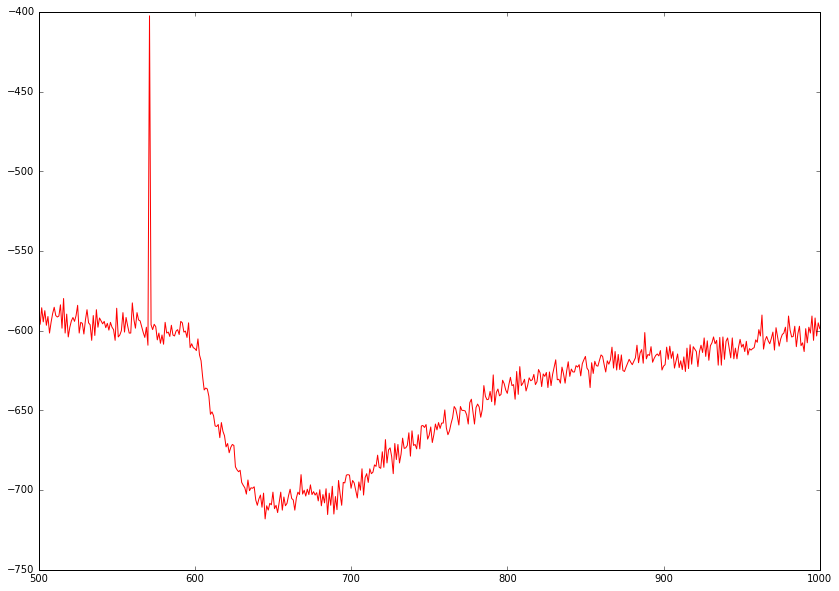

In [68]:
plt.figure(figsize=(14,10))
plt.xlim(500,1000)
plt.plot(canalma, color="red")
plt.show()

In [58]:
plt.ion()